# TimML Exercises

## Exercise 3: Inhomogeneities

Consider a two-aquifer system that contains one inhomogeneity. Inside the inhomogeneity the transmissivity
of the top aquifer is much lower and the transmissivity of the bottom aquifer is much higher than outside the
inhomogeneity. Aquifer properties are given in Table 1 and the inhomogeneity data is given in table 2. There is a uniform gradient of 0.002 in Southeastern
direction.

#### Table 1: Aquifer data

|             | $k$ (m/d) | $z_b$ (m)  | $z_t$ | $c$ (days)|
|------------:|----------:|----------:|------:|-----------:|
|Aquifer 0    |    10     |     0     |   20  |            |
|Leaky Layer 1|           |    -10    |   0   |   4000     |
|Aquifer 1    |    20     |    -30    |   10  |            ||

#### Table 2: Inhomogeneity 1 data


|             | $k$ (m/d) | $z_b$ (m) | $z_t$ | $c$ (days) |
|------------:|----------:|----------:|------:|-----------:|
|Aquifer 0    |    2      |     0     |   20  |            |
|Leaky Layer 1|           |    -10    |   0   |   500      |
|Aquifer 1    |    80     |    -30    |   -10  |           ||


A layout of the nodes of the inhomogeneity are shown in Fig. 1 (inhomogeneity 2 will be added
later on). A well is located in the top aquifer inside inhomogeneity 1 (the black dot).

<img src="figs/inhomogeneity_exercise3.png"> </img>

#### Figure 1: Layout of elements for exercise 3. A well is located inside inhomogeneity 1. Inhomogeneity 2 is added in the second part of the exercise.

In [1]:
from timml import *
from pylab import *
%matplotlib notebook

In [73]:
ml = ModelMaq(kaq=[10, 20], z=[20, 0, -10, -30], c=[4000])
xy1 = [(0, 600), (-100, 400), (-100, 200), (100, 100), (300, 100), (500, 100),
       (700, 300), (700, 500), (600, 700), (400, 700), (200, 600)]
p1 = PolygonInhomMaq(ml, xy=xy1, 
                     kaq=[2, 80], z=[20, 0, -10, -30], c=[500], 
                     top='conf', order=0, ndeg=1)
rf = Constant(ml, xr=1000, yr=0, hr=40)
uf = Uflow(ml, slope=0.002, angle=-45)
#w = Well(ml, xw=400, yw=400, Qw=500, rw=0.2, layers=0)
ml.solve()

Number of elements, Number of equations: 25 , 46
.........................
solution complete


In [74]:
ml.aq.elementlist

[Constant at (1000, 0) with head  40,
 Uflow with slope and angle: (0.002, -45),
 IntFluxDiffLineSink from (0.0, 600.0) to (-100.0, 400.0),
 IntFluxDiffLineSink from (-100.0, 400.0) to (-100.0, 200.0),
 IntFluxDiffLineSink from (-100.0, 200.0) to (100.0, 100.0),
 IntFluxDiffLineSink from (100.0, 100.0) to (300.0, 100.0),
 IntFluxDiffLineSink from (300.0, 100.0) to (500.0, 100.0),
 IntFluxDiffLineSink from (500.0, 100.0) to (700.0, 300.0),
 IntFluxDiffLineSink from (700.0, 300.0) to (700.0, 500.0),
 IntFluxDiffLineSink from (700.0, 500.0) to (600.0, 700.0),
 IntFluxDiffLineSink from (600.0, 700.0) to (400.0, 700.0),
 IntFluxDiffLineSink from (400.0, 700.0) to (200.0, 600.0),
 IntFluxDiffLineSink from (200.0, 600.0) to (0.0, 600.0)]

In [75]:
p1.elementlist

[IntHeadDiffLineSink from (0.0, 600.0) to (-100.0, 400.0),
 IntHeadDiffLineSink from (-100.0, 400.0) to (-100.0, 200.0),
 IntHeadDiffLineSink from (-100.0, 200.0) to (100.0, 100.0),
 IntHeadDiffLineSink from (100.0, 100.0) to (300.0, 100.0),
 IntHeadDiffLineSink from (300.0, 100.0) to (500.0, 100.0),
 IntHeadDiffLineSink from (500.0, 100.0) to (700.0, 300.0),
 IntHeadDiffLineSink from (700.0, 300.0) to (700.0, 500.0),
 IntHeadDiffLineSink from (700.0, 500.0) to (600.0, 700.0),
 IntHeadDiffLineSink from (600.0, 700.0) to (400.0, 700.0),
 IntHeadDiffLineSink from (400.0, 700.0) to (200.0, 600.0),
 IntHeadDiffLineSink from (200.0, 600.0) to (0.0, 600.0),
 ConstantInside]

In [76]:
ml.velocity(200, 400, 10)

array([ 0.00677983, -0.00949091, -0.00036299])

In [77]:
ml.head(400, 0)

array([ 40.74234426,  41.21200455])

In [78]:
uf.potinf(200, 300, ml.aq), uf.parameters

(array([[-200.,    0.],
        [-300.,    0.]]), array([[ 0.84852814],
        [-0.84852814]]))

### Questions
#### Exercise 3a
What are the leakage factors of the background aquifer and the inhomogeneity?

In [79]:
print('Leakage factor of the background aquifer is:', ml.aq.lab)
print('Leakage factor of the inhomogeneity is:', p1.lab)

Leakage factor of the background aquifer is: [   0.          730.29674334]
Leakage factor of the inhomogeneity is: [   0.          139.68605915]


In [80]:
ml.head(200, 400)

array([ 41.660808  ,  41.55191102])

#### Exercise 3b
Make a contour plot of both aquifers.

<IPython.core.display.Javascript object>


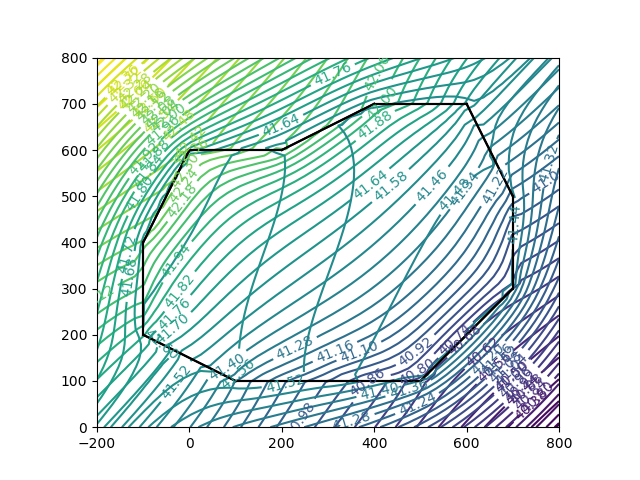

In [81]:
ml.contour(x1=-200, x2=800, nx=50, y1=0, y2=800, ny=50, layers=[0, 1], levels=50, labels=1, decimals=2)

In [82]:
ml.aq.T, p1.T

(array([ 200.,  400.]), array([   40.,  1600.]))

In [83]:
ml.disvec(0, 0)

array([[ 0.33161747,  0.2596972 ],
       [-0.25141896, -0.45356887]])

<IPython.core.display.Javascript object>


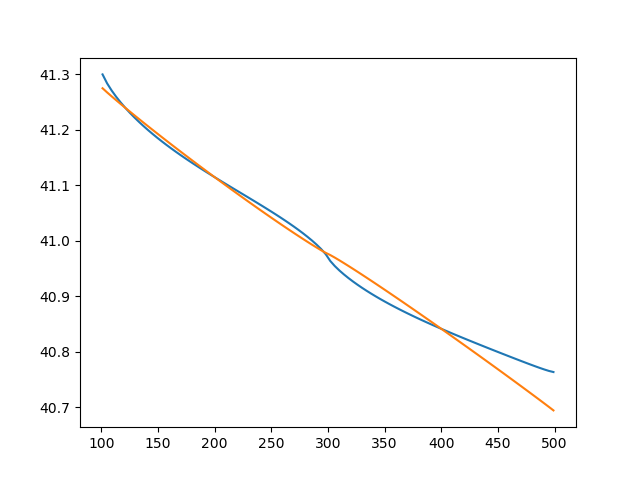

In [84]:
htop = ml.headalongline(linspace(101, 499, 100), 100 + 0.001 * ones(100))
hbot = ml.headalongline(linspace(101, 499, 100), 100 - 0.001 * ones(100))
figure()
plot(linspace(101, 499, 100), htop[0])
plot(linspace(101, 499, 100), hbot[0])

<IPython.core.display.Javascript object>


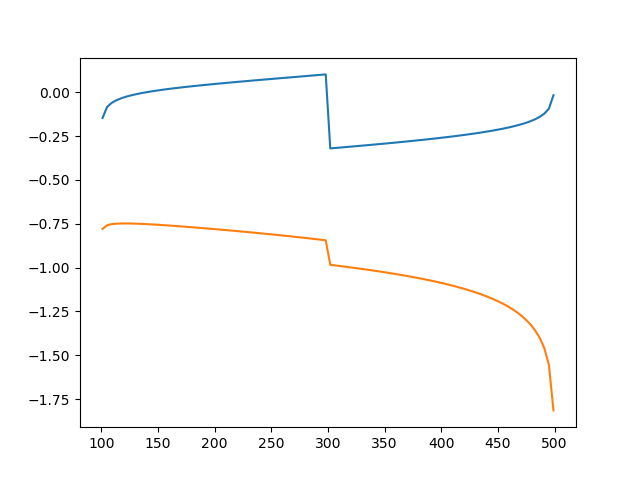

In [86]:
qtop = zeros(100)
qbot = zeros(100)
layer = 1
x = linspace(101, 499, 100)
for i in range(100):
    qx, qy = ml.disvec(x[i], 100 + 0.001)
    qtop[i] = qy[layer]
    qx, qy = ml.disvec(x[i], 100 - 0.001)
    qbot[i] = qy[layer]
figure()
plot(x, qtop)
plot(x, qbot)

#### Exercise 3c
Create a 20-year capture zone for the well, starting the pathlines halfway the top aquifer. First create a contour plot with a cross-section below it.

<IPython.core.display.Javascript object>


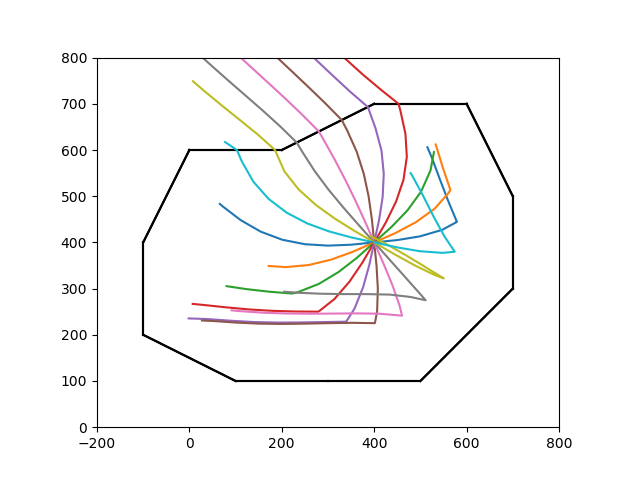

....................


In [20]:
ml.plot(win=[-200, 800, 0, 800])
w.plotcapzone(hstepmax=50, nt=20, zstart=10, tmax=20 * 365.25)

reached tmax


<IPython.core.display.Javascript object>


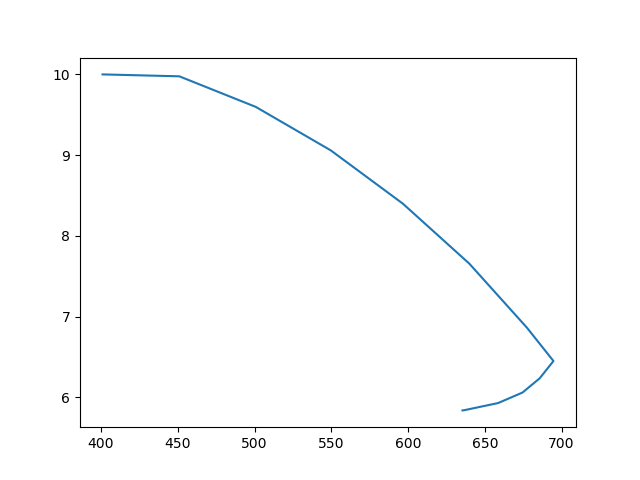

In [16]:
tr = timtraceline(ml, 401, 400, 10, -50, nstepmax=200, tmax=20 * 365.25)
figure()
plot(tr[:, 0], tr[:, 2])

<IPython.core.display.Javascript object>


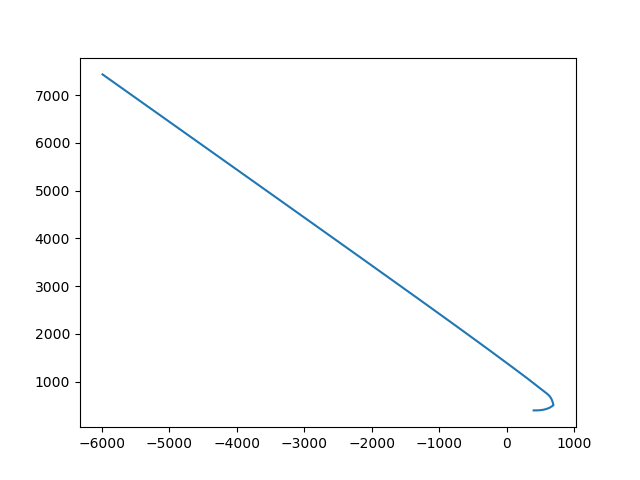